University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2022  
Luigi Acerbi  

# Week 1 exercises

In [1]:
# Useful imports
%matplotlib inline
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.linalg as slg

## 1. Input ranges for overflow and underflow (4 pts)

i. Write a program to find the largest integer for which `exp()` over double precision floating point numbers (`float64`) returns a finite value.

ii. The logistic function $$ \phi(x) = \frac{1}{1 + \exp(-x)} $$ is often used to map the real line to probabilities in the range $(0, 1)$, for example in logistic regression. For real numbers, the equation $ \phi(x) = 1 $ has no solution, but the same is not true for floating point numbers on a computer. Write a program to determine the smallest integer $ x $ for which $ \phi(x) =_F 1$ when using double precision floating point (`float64`) arithmetic.

*Note*: "Write a program" means you should not try out all values manually, but program the computer to find the solution.

In [2]:
def findLargestInteger():
    large_integer = 10
    while not np.isinf(np.exp(large_integer)):
        large_integer += 1
    return large_integer - 1

# The result is 709
print(findLargestInteger())
# print(np.exp(709))


def findBigIntegerForOne():
    large_integer = 10
    while 1/(1 + np.exp(-1*large_integer)) != 1:
        large_integer += 1
    return large_integer

# The result is 37
print(findBigIntegerForOne())
# print(1/(1+np.exp(-37)))

709
37


/tmp/ipykernel_8843/352962539.py:3: RuntimeWarning: overflow encountered in exp
  while not np.isinf(np.exp(large_integer)):


## 2. Numerical computation of binomial probabilities (4 pts)

Write a computer program to compute sums of binomial probabilities:
$$ f(l, u, n, p) = \sum_{i=l}^u \binom{n}{i} p^i (1-p)^{n-i}. $$
Use it to compute:

i. $ f(0, 5, 10, 0.25) = \sum_{i=0}^{5} \binom{10}{i} 0.25^i 0.75^{10-i} $

ii. $ f(10, 20, 20, 0.25) = \sum_{i=10}^{20} \binom{20}{i} 0.25^i 0.75^{20-i} $

iii. $ f(40, 60, 100, 0.25) = \sum_{i=40}^{60} \binom{100}{i} 0.25^i 0.75^{100-i} $

iv. $ f(75, 100, 100, 0.25) = \sum_{i=75}^{100} \binom{100}{i} 0.25^i 0.75^{100-i} $

*Hint*: Remember to use log probabilities and `logsumexp` as appropriate.

In [3]:
def logBinomialCoeff(n, k):
    if k > n:
        raise Exception("k cannot be greater than n in binomial coefficient")
    res = 0
    for i in range(1, n+1):
        res += np.log(i)
    for i in range(1, k+1):
        res -= np.log(i)
    for i in range(1, n-k+1):
        res -= np.log(i)
    return res
    
def calculateSumTerm(n, i, p):
    log_ver = logBinomialCoeff(n, i)
    log_ver += i*np.log(p) + (n-i)*np.log(1-p)
    return np.exp(log_ver)

def calculateSum(l, u, n, p):
    res = 0
    for i in range(l, u+1):
        res += calculateSumTerm(n, i, p)
    return res

print("f(0, 5, 10, 0.25) = ", calculateSum(0, 5, 10, 0.25))
print("f(10, 20, 20, 0.25) = ", calculateSum(10, 20, 20, 0.25))
print("f(40, 60, 100, 0.25) = ", calculateSum(40, 60, 100, 0.25))
print("f(75, 100, 100, 0.25) = ", calculateSum(75, 100, 100, 0.25))

f(0, 5, 10, 0.25) =  0.9802722930908243
f(10, 20, 20, 0.25) =  0.01386441694376125
f(40, 60, 100, 0.25) =  0.0006865922079344215
f(75, 100, 100, 0.25) =  1.4350852738019386e-25


## 3. Numerical evaluation of multivariate normal probabilities (4 pts)

Consider the $d$-variate normal distribution $\mathcal{N}(x;\; \mu, \Sigma)$ with the log-probability density
$$ \ln p(x;\; \mu, \Sigma) = -\frac{d}{2} \ln(2 \pi) - \frac{1}{2} \ln |\det \Sigma| - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu). $$
Let $\mu = \begin{pmatrix}0 \\ 0\end{pmatrix}$, $\Sigma = \begin{pmatrix}2^2 & 2\rho \\ 2\rho & 1\end{pmatrix}$.

Evaluate the following log-probabilities:

i. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.8$

ii. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iii. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iv. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = -0.999$

*Note*: `ln` denotes the logarithm in natural base (for us it is the same as `log`, per our usual notational convention).

In [4]:
def logDetSigma(sigma):
    diag = sigma.diagonal()
    diag = np.log(diag)
    return 2*np.sum(diag)

def quadFormEval(L, x, mu):
    z = slg.solve_triangular(L, x-mu, lower=True)
    return np.transpose(z) @ z

def calcLnP(x, mu, sigma):
    L = slg.cholesky(sigma, lower=True)
    d = sigma.shape[0]
    return -0.5*d*np.log(2*np.pi) - 0.5*logDetSigma(L) - 0.5*quadFormEval(L, x, mu)

def createSigma(rho):
    return np.matrix([ [4, 2*rho], [2*rho, 1] ])

mu = np.array([[0], [0]])

# 1
x = np.array([[0], [0]])
sigma = createSigma(0.8)
print("Case 1: ", calcLnP(x, mu, sigma).item())

# 2
x = np.array([[0], [0]])
sigma = createSigma(0.999)
L = slg.cholesky(sigma, lower=True)
print("Case 2: ", calcLnP(x, mu, sigma).item())

# 3
x = np.array([[1], [1]])
sigma = createSigma(0.999)
print("Case 3: ", calcLnP(x, mu, sigma).item())

# 4
x = np.array([[1], [1]])
sigma = createSigma(-0.999)
print("Case 4: ", calcLnP(x, mu, sigma).item())

Case 1:  -2.0201986232033
Case 2:  0.5765298647626529
Case 3:  -62.204860830585844
Case 4:  -561.9547357680615


## 4. Rejection sampling of Beta(2, 3) (4 pts)

Write a program to draw samples from the $\text{Beta(2, 3)}$ distribution
$ p(x) = 12 x (1-x)^2, \quad 0 \le x \le 1 $  
using the uniform distribution on the interval $(0, 1)$ as the proposal distribution $q(x)$.

Remember that you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is a good way to start looking for one.

Plot a normed histogram of your samples together with the density to check that they match.

Draw at least 10000 samples from the distribution and report your estimate of $ \mathbb{E}[x^5] $ for $ x \sim \mathrm{Beta}(2, 3)$.

*Note*: Please report the actual value you obtain to Moodle, not your guess of the true value. Values within the expected Monte Carlo error will be accepted as correct.

*Hint for evaluating the expectation* $\mathbb{E}[x^5]$: assuming we have samples $x_i \sim p(x), i = 1, \dots, n$ following the distribution $p(x)$, we can compute a simple Monte Carlo approximation of the expectation of an arbitrary function $g(x)$ as
$$ \mathbb{E}_p[g(x)] \approx \frac{1}{n} \sum_{i=1}^n g(x_i), \qquad \text{ for } x_i \sim p(x).$$

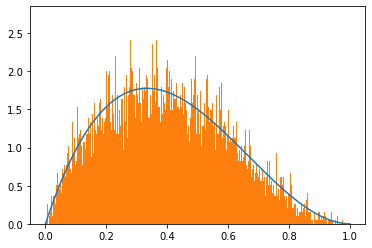

Expected value:  0.04719562489839763


In [5]:
npr.seed(0)

def beta(x):
    return 12*x*(1-x)*(1-x)

# x is constrained to 0<= x <=1 so it always returns 1
def unif(x):
    return 1

# Biggest estimated value from here: ~1.778. Proposal M: 1.8
# sample = np.arange(0, 1, 0.001)
# print(max(beta(sample)/unif(sample)))

def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    """
    Returns N samples following pdf f_pdf() using proposal g(x)
    with pdf g_pdf() that can be sampled by g_sample().
    Requirement: f_pdf(x) <= M*g_pdf(x) for all x.
    """
    i = 0
    rejects = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0, 1)
        if (u * M * g_pdf(x_prop)) < f_pdf(x_prop):
            # Accept the sample and record it
            x[i] = x_prop
            i += 1
        else:
            rejects += 1
#     print("Acceptance rate:", N/(N+rejects))
    return x

def calculateExpectedFive(x):
    return sum(x**5)/len(x)

def plotHistWithDistEx4():
    hist_sample = RejectionSampler( beta, unif, npr.uniform, 1.8, 10000 )
    pdf_sample_space = np.arange(0, 1, 0.001)
    pdf = beta(pdf_sample_space)
    
    plt.plot(pdf_sample_space, pdf)
    plt.hist(hist_sample, bins=500, density=True)
    plt.show()
    return hist_sample

sample = plotHistWithDistEx4()
print("Expected value: ", calculateExpectedFive(sample))

## 5. Rejection sampling of a Gaussian with Laplace  (4 pts)

Consider the standard $\text{Laplace}(0, 1)$ distribution defined by:
$$ q(x) = 1/2 \exp(- | x | ),$$ 
and the standard normal distribution defined by
$$p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left( - \frac{1}{2} x^2 \right).$$
For both the Laplace and normal distribution, $x \in (-\infty, \infty)$.

1. Write a program to draw samples from the $\text{Laplace}(0, 1)$ distribution. (*Hint*: transformation considered on Lecture 2.) Test your program by comparing the normed histogram of the samples with the density.
2. Design a method to draw samples from the standard normal using the standard Laplace distribution as the proposal. (*Hint*: you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is again useful for looking for one.)
3. Use 10000 samples to compute the expectation $ E[x^4] $ for $ x $ following the standard normal distribution.
4. Assume the underlying uniform random generator uses full 53 bits of precision of `float64` and produces random numbers in the range $[2^{-53}, 1]$ with increments of $2^{-53}$. Considering the same setup as above, what is the largest value the rejection sampling method can generate, if it were executed for long enough? 

Hints for part 5.4:
- You need to check that the algorithm can both generate an extreme value, and accept it. What's the equation for accepting a value in rejection sampling?
- You can use the same $M$ that you used in part 5.2 (as long as you chose a reasonable $M$, the answer will be valid).

Acceptance rate: 0.7919537499010058


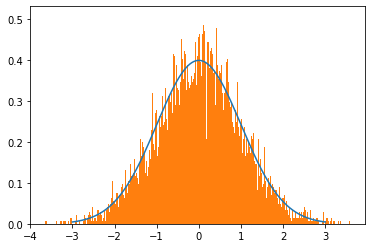

Expected value:  3.028328802909941


In [6]:
def laplacePDF(x):
    return 0.5*np.exp(-np.absolute(x))

def sampleLaplace(x):
    if x < 0.5:
        return -np.log(2*x)
    return np.log(2*x)

def normalPDF(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-0.5*x*x)

# Biggest estimated value from here: ~1.253. Proposal M: 1.3
# sample = np.arange(0, 1, 0.001)
# print(max(laplacePDF(sample)/normalPDF(sample)))

def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    """
    Returns N samples following pdf f_pdf() using proposal g(x)
    with pdf g_pdf() that can be sampled by g_sample().
    Requirement: f_pdf(x) <= M*g_pdf(x) for all x.
    """
    i = 0
    rejects = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0, 1)
        if (u * M * g_pdf(x_prop)) < f_pdf(x_prop):
            # Accept the sample and record it
            x[i] = x_prop
            i += 1
        else:
            rejects += 1
    print("Acceptance rate:", N/(N+rejects))
    return x

def calculateExpectedFour(x):
    return sum(x**4)/len(x)

def plotHistWithDistEx5():
    hist_sample = RejectionSampler( normalPDF, laplacePDF, npr.laplace, 1.26, 10000 )
    pdf_sample_space = np.arange(-3, 3, 0.001)
    pdf = normalPDF(pdf_sample_space)
    
    plt.plot(pdf_sample_space, pdf)
    plt.hist(hist_sample, bins=500, density=True)
    plt.show()
    return hist_sample

sample = plotHistWithDistEx5()
print("Expected value: ", calculateExpectedFour(sample))